## 2-ая неделя Решающие деревья
<a href='https://habr.com/ru/company/ods/blog/322534/'>Отличная статья</a>
<a href='https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8'>Еще одна отличная статья</a>
<a href='https://www.youtube.com/watch?v=-dCtJjlEEgM'>Лекция</a>
<a href='http://www.r2d3.us'>Визуализация</a>

### Основные понятия
<a href='https://www.youtube.com/watch?v=IPkRVpXtbdY'>Entropy and Information gain</a>
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>Train / test split</a>
<a href='http://scikit-learn.org/stable/modules/cross_validation.html'>K-fold cross-validation</a>
<a href='http://scikit-learn.org/stable/modules/grid_search.html'>Hyper parameters and Grid search</a>

Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

In [3]:
import pandas as pd
from math import log2

В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

In [173]:
animals_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', index_col=0)
animals_data.head()

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик


In [174]:
animals_data.groupby('Шерстист')['Вид'].count()

Шерстист
1    8
Name: Вид, dtype: int64

In [177]:
animals_data.groupby('Гавкает')['Вид'].count()

Гавкает
0    4
1    4
Name: Вид, dtype: int64

In [178]:
animals_data.groupby('Лазает по деревьям')['Вид'].count()

Лазает по деревьям
0    4
1    4
Name: Вид, dtype: int64

In [237]:
animals_data_update = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
animals_data_update

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [268]:
E_sh_1 = -(4/9)*log2((4/9)) - (5/9)*log2((5/9))
print(E_sh_1)
E_sh_0 = -0 - (1/1)*log2(1/1)
print(E_sh_0)
E_gav_1 = -(4/5)*log2((4/5)) - (1/5)*log2((1/5))
print(E_gav_1)
E_gav_0 = - 0 - (5/5)*log2((5/5))
print(E_gav_0)
E_laz_1 = -0 - (6/6)*log2((6/6))
print(E_laz_1)
E_laz_0 = -(4/4)*log2((4/4)) - 0
print(E_laz_0)

0.9910760598382222
0.0
0.7219280948873623
0.0
0.0
-0.0


In [271]:
s_0 = -(4/10) * log2(4/10) - (6/10) * log2(6/10)
print(s_0)
ig_sh = s_0 - (9/10) * E_sh_1 - (1/10) * E_sh_0
print(round(ig_sh, 2))
ig_gav = s_0 - (5/10) * E_gav_1 - (5/10) * E_gav_0
print(round(ig_gav, 2))
ig_laz = s_0 - (6/10) * E_laz_1 -  (4/10) * E_laz_0
print(round(ig_laz, 2))

0.9709505944546686
0.08
0.61
0.97


# Задача
Предсказать выживание на Титанике, используя дерево решений.
<a href='https://www.kaggle.com/competitions/titanic/data'>Kaggle</a>
<a href='https://scikit-learn.org/stable/modules/cross_validation.html'>Кросс-валидация</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [2]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)

In [5]:
y = titanic_train_data['Survived']

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

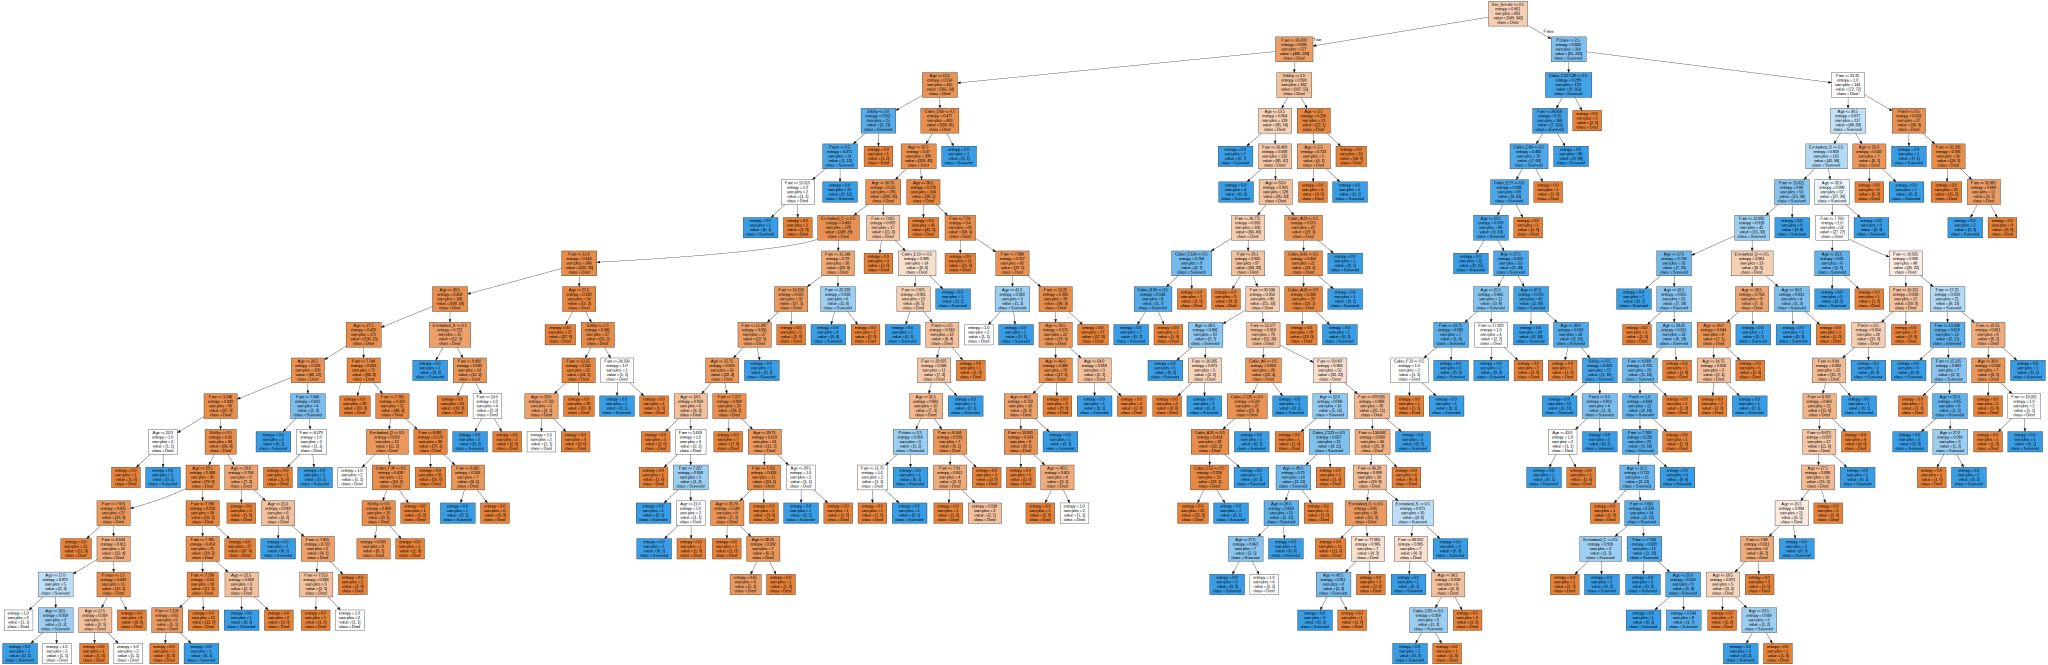

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

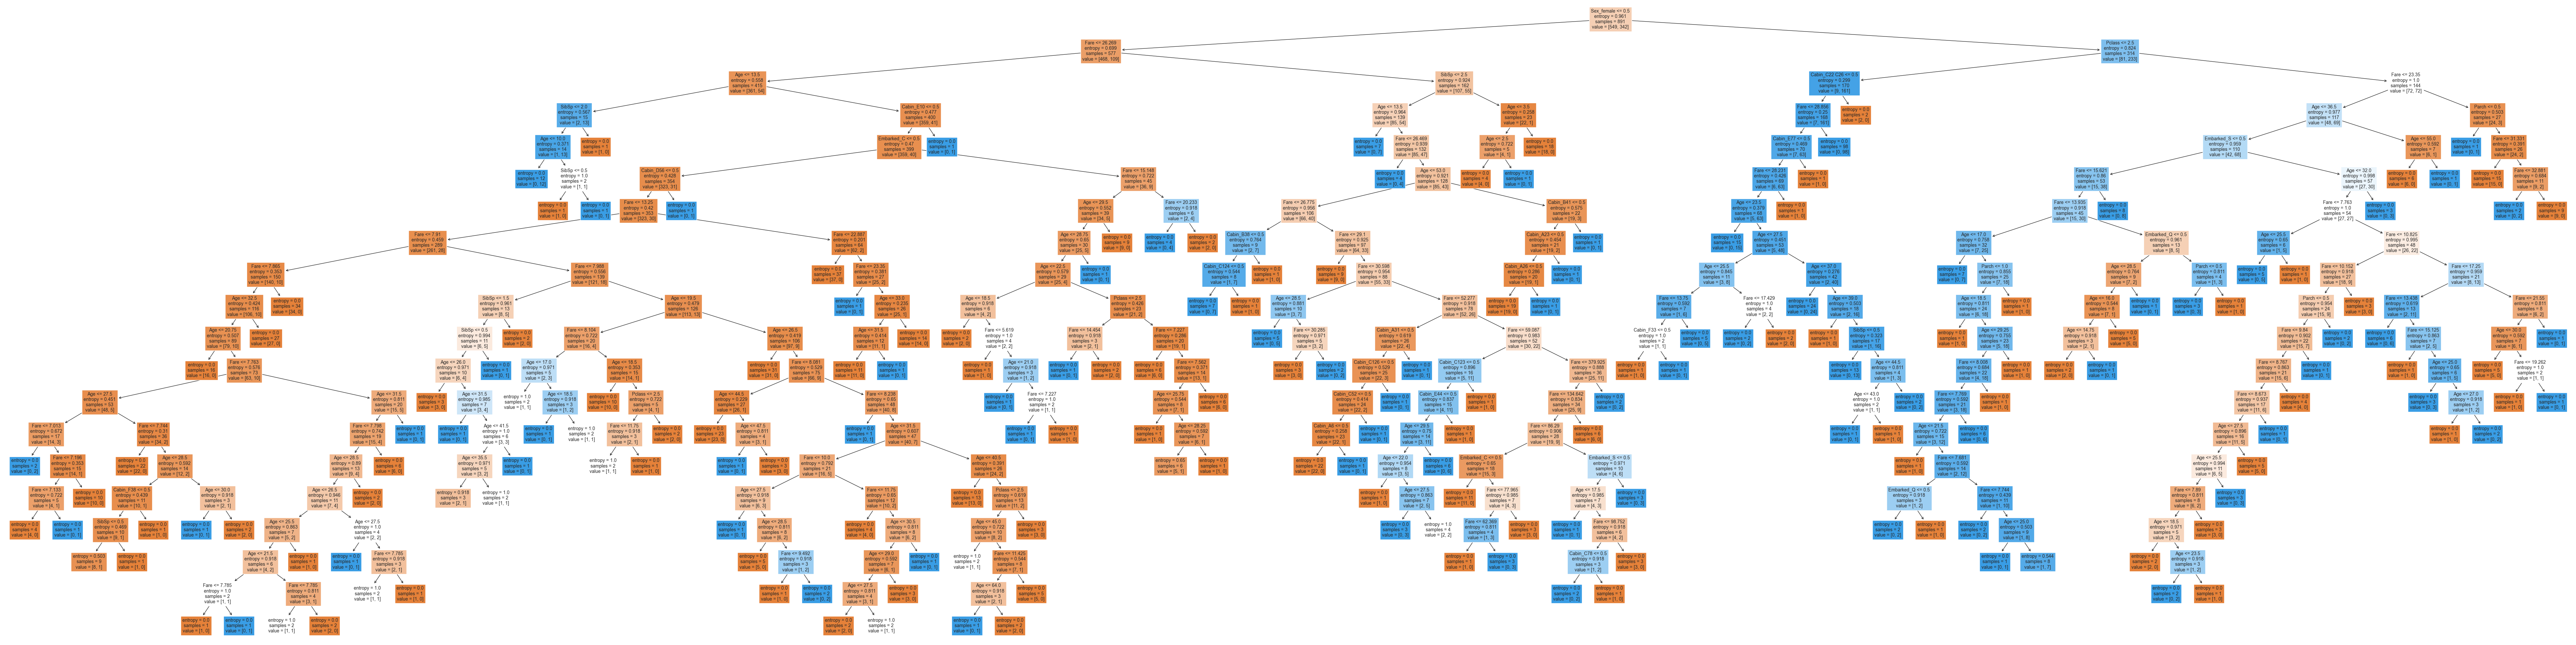

In [17]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
clf.score(X_train, y_train)

0.8271812080536913

In [43]:
clf.score(X_test, y_test)

0.8203389830508474

In [45]:
data = []
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_data = (max_depth, train_score, test_score)
    data.append(temp_data)
scores_data = pd.DataFrame(data, columns=['max_depth', 'train_score', 'test_score'])

In [46]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
1,2,0.805369,0.776271
2,3,0.827181,0.820339
3,4,0.840604,0.823729
4,5,0.847315,0.816949


In [47]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

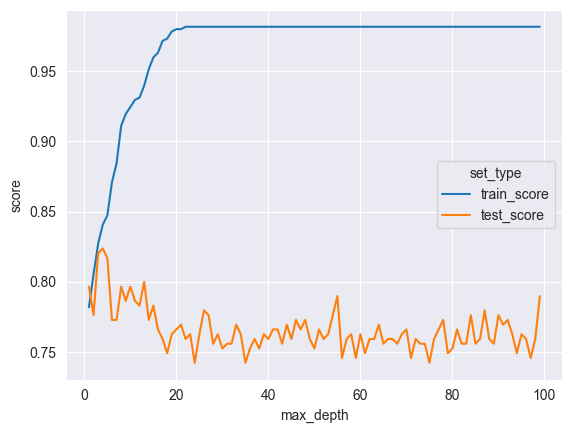

In [48]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [ ]:
'''
Так выглядит возможный пример дерева с параметром максимальной глубины равным 3. Легко можно заметить, что особенно важными переменными для анализа является пол и возраст. Кстати, про то, как при помощи дерева решений вычленить фичи, максимально важные для решения конкретной задачи классификации, мы подробнее поговорим в 3 модуле курса.

Тут же обратите внимание на еще один важный момент, если бы к нам поступил новый пассажир, и мы бы захотели, предсказать для него не только значение класса но и вероятность, того что он выживет на Титанике, это было бы несложно сделать при помощи нашего дерева. Обратите внимание, цвет финальных прямоугольничков различается, соотношение выживших/погибших пассажиров различается в финальных исходах - прямоугольничках.

Например, если бы к нам пришло новое наблюдение Sex_male <=0.05, Pclass <= 2.5, Age > 2.5,  то предсказанная вероятность выжить была бы равна 102 / (102 + 3), то есть 97%.

Но давайте сразу поймем, что с нашим деревом не так? Обратите внимание, что данное дерево все равно выглядит переобученным, например, есть разделение, которое приводит к тому, что под условие Age <= 2.5 проходит всего два наблюдения с разными классами, запомним эту проблему деревьев и вернемся к ней позже.
'''

In [50]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

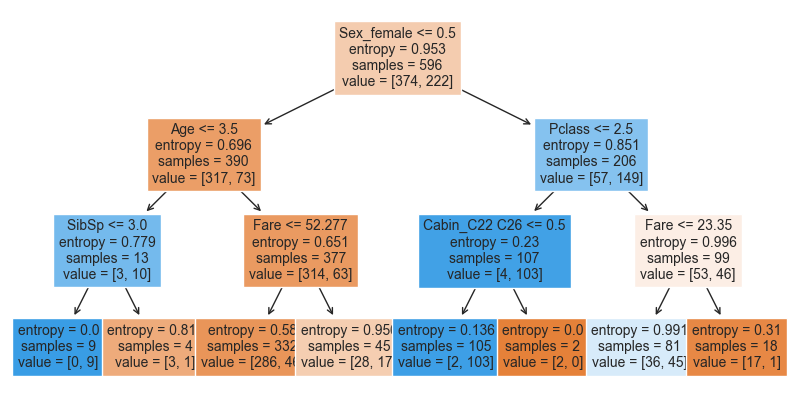

In [54]:
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)
plt.show()

In [58]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
cross_val_score(clf, X_train, y_train , cv=5)
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7953501400560224

In [62]:
max_depth_values = range(1, 100)

In [63]:
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated 

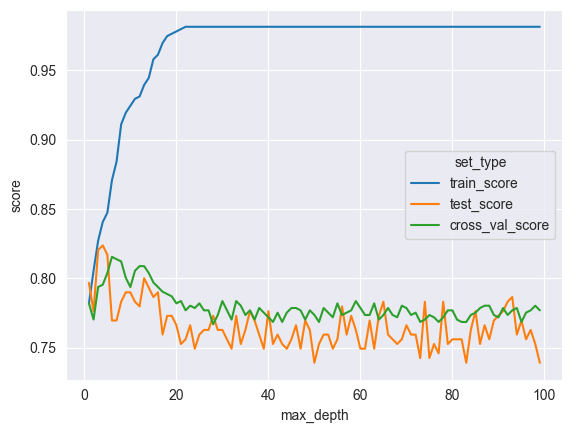

In [65]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)
plt.show()

In [66]:
cross_val_scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.793683
201,4,cross_val_score,0.795350
202,5,cross_val_score,0.803754
203,6,cross_val_score,0.815462
204,7,cross_val_score,0.813782
205,8,cross_val_score,0.812143
206,9,cross_val_score,0.800378
207,10,cross_val_score,0.793655


In [67]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7694915254237288

In [69]:
iris_train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [76]:
X_train = iris_train_data.drop(['species'], axis=1)
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [77]:
y_train = iris_train_data['species']
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [79]:
iris_test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
iris_test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [80]:
X_test = iris_test_data.drop(['species'], axis=1)
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [81]:
y_test = iris_test_data['species']
y_test.head()

114    2
70     1
138    2
59     1
44     0
Name: species, dtype: int64

In [88]:
rs = np.random.seed(0)

In [89]:
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated 

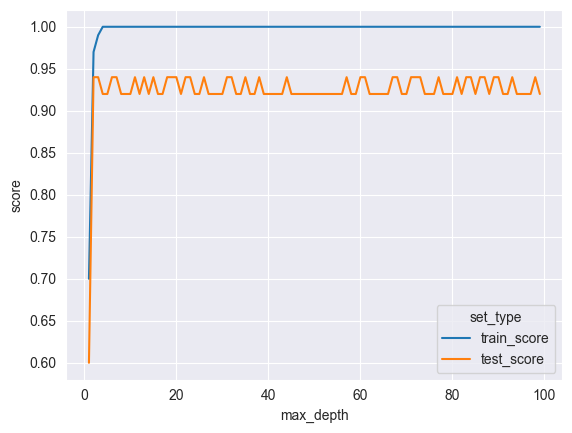

In [90]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)
plt.show()

### Задача
Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [91]:
data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
data_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [93]:
X_train = data_train.drop(['Вид'], axis=1)
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [100]:
y_train = data_train['Вид']
y_train.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [101]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [102]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [103]:
clf.score(X_train, y_train)

1.0

In [110]:
y = pd.Series(clf.predict(X_train))

In [116]:
y.value_counts()

собачка    500
котик      500
dtype: int64

In [118]:
test_data = pd.read_json('/Users/mitya/Downloads/dataset_209691_15.txt')
test_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,17,20.4,1,1,0
1,34,40.8,1,1,0
2,27,32.4,1,1,0
3,29,34.8,1,1,0
4,34,40.8,1,1,0


In [120]:
X_test = test_data
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,17,20.4,1,1,0
1,34,40.8,1,1,0
2,27,32.4,1,1,0
3,29,34.8,1,1,0
4,34,40.8,1,1,0


In [121]:
y_test = pd.Series(clf.predict(X_test))

In [122]:
y_test.value_counts()

собачка    56
котик      44
dtype: int64

In [125]:
# Считать данные для обучения Дерева
dogs_n_cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
X_train = dogs_n_cats.drop('Вид', axis=1)
y_train = dogs_n_cats['Вид']

# Обучение Дерева
rs = np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=5)
clf.fit(X_train, y_train)

# Результат обучения
clf.score(X_train, y_train)



# Считать тестовые данные
X_test = pd.read_json('/Users/mitya/Downloads/dataset_209691_15.txt')

# Предсказать результаты
y_pred = clf.predict(X_test)

# Подсчитать количество собачек
pd.Series(y_pred)[y_pred == 'собачка'].count()

56

### Precision, Recall, F1-score
Precision = TP / (TP + FP)  главное не ошибиться (не прихватить лишнее), FP — пометили неправильные, как правильные
Recall = TP / (TP + FN)  главное не пропустить нужное, FN — пропустили правильные, не все пометили
F1 = 2 * (Precision * Recall) / (Precision + Recall)

<img src='/Users/mitya/Desktop/Снимок экрана 2022-11-10 в 10.25.39.png'/>

### Задача
Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

Исходные данные взяты отсюда, слегка процессированные можно взять здесь (исходные колонки типа жанра, года были выкинуты в задании)

In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [127]:
music_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
music_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [128]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song          360 non-null    object
 1   year          360 non-null    int64 
 2   artist        360 non-null    object
 3   genre         360 non-null    object
 4   lyrics        360 non-null    object
 5   length        360 non-null    int64 
 6   commas        360 non-null    int64 
 7   exclamations  360 non-null    int64 
 8   colons        360 non-null    int64 
 9   hyphens       360 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 28.2+ KB


In [131]:
X = music_data.drop(['song', 'artist', 'lyrics'], axis=1)

In [132]:
X = pd.get_dummies(X)
X.head()

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,1300,24,5,0,11,1,0,0
1,2006,1566,0,0,0,0,0,1,0
2,2006,996,1,0,1,0,0,1,0
3,2015,2868,5,0,0,0,0,1,0
4,2014,3351,22,0,0,3,1,0,0


In [133]:
y = music_data['artist']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [148]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=2)

In [149]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [150]:
clf.score(X_train, y_train)

1.0

In [151]:
clf.score(X_test, y_test)

1.0

In [156]:
y_test

224              abba
42          gangstarr
285              abba
302              abba
56               abba
            ...      
79          gangstarr
163    blind-guardian
18     blind-guardian
301         gangstarr
104              abba
Name: artist, Length: 119, dtype: object

In [161]:
predictions = clf.predict(X_test)
y_pred = pd.concat([pd.Series(predictions), pd.Series(y)], axis=1)
y_pred

,0,artist
0,abba,gangstarr
1,gangstarr,blind-guardian
2,abba,blind-guardian
3,abba,blind-guardian
4,abba,gangstarr
...,...,...
355,NaN,abba
356,NaN,abba
357,NaN,abba
358,NaN,gangstarr


In [165]:
precision = precision_score(y_test, predictions, average='micro')

In [166]:
precision

1.0

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
depth = 1
while True:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    precision = precision_score(y_test, predictions, average='micro')
    if precision > 0.78:
        break
    else:
        depth += 1

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
precision = precision_score(y_test, predictions, average='micro')

### ROC кривая, GridSearchCV, автоматический поиск оптимальных параметров
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>GridSearchCV</a>

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [196]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_train_data['Survived']
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rs)
clf = tree.DecisionTreeClassifier()

In [197]:
params={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
# params={'criterion':['entropy'], 'max_depth': range(1, 30)}

In [198]:
# модуль GridSearchCV позволяет автоматически подобрать оптимальные параметры модели
# параметры: классификатор, набор параметров, которые будут сравниваться, параметры кросс-валидации, в нашем случае 5 фолдов
grid_search_cv_clf=GridSearchCV(clf, params, cv=5)

In [199]:
# по сути повторили ручной подбор оптимальных параметров, который делали ранее.
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [200]:
# выводим оптимальные параметры
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [201]:
# сохраняем оптимальные параметры
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(max_depth=5)

In [202]:
# смотрим итоговый score
best_clf.score(X_test, y_test)

0.8212290502793296

In [203]:
# предсказываем значение зависимой переменной
y_pred = best_clf.predict(X_test)

In [204]:
# проверяем Precision
precision_score(y_test, y_pred)

0.8135593220338984

In [205]:
# проверяем Recall
recall_score(y_test, y_pred)

0.6956521739130435

In [206]:
# Попробовав разные параметры можно добиться необходимых нам значений Precision и Recall для решения конкретной бизнес задачи.

In [209]:
# каковы вероятности исходов
y_pred_prob = best_clf.predict_proba(X_test)
y_pred_prob

array([[0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [1.        , 0.        ],
       [0.03125   , 0.96875   ],
       [0.44897959, 0.55102041],
       [0.58571429, 0.41428571],
       [0.03125   , 0.96875   ],
       [0.03125   , 0.96875   ],
       [0.58571429, 0.41428571],
       [0.15625   , 0.84375   ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.03125   , 0.96875   ],
       [0.15625   , 0.84375   ],
       [0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [0.        , 1.        ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.58571429, 0.41428571],
       [0.44897959, 0.55102041],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.15625   , 0.84375   ],
       [0.03125   , 0.96875   ],
       [0.5       , 0.5       ],
       [0.

In [210]:
# по умолчанию классификатор относит наблюдение к тому или иному исходу по отсечке в 0.5, но мы можем тюнить этот порог для достижения
# необходимых показателей Precision и Recall

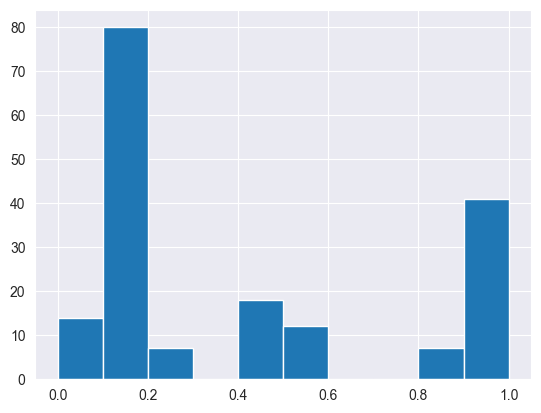

In [214]:
# Посмотрим как распределились вероятности. Мы видим, что есть группа меджу 0.4 и 0.6, которую
# мы можем отнести к выжившим или умершим в зависимости от того, что для нас важнее Precision или Recall.
pd.Series(y_pred_prob[:, 1]).hist()
plt.show()

In [216]:
y_pred_v2 = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [217]:
precision_score(y_test, y_pred_v2)

0.8958333333333334

In [218]:
recall_score(y_test, y_pred_v2)

0.6231884057971014

In [219]:
y_pred_v3 = np.where(y_pred_prob[:, 1] > 0.2, 1, 0)

In [220]:
precision_score(y_test, y_pred_v3)

0.7435897435897436

In [221]:
recall_score(y_test, y_pred_v3)

0.8405797101449275

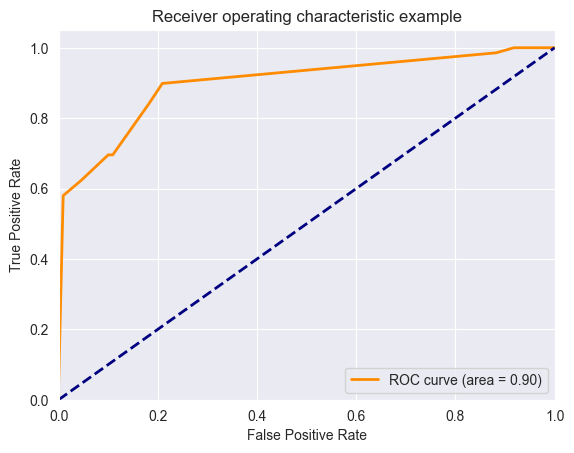

In [223]:
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)
2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.
3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения
'''

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


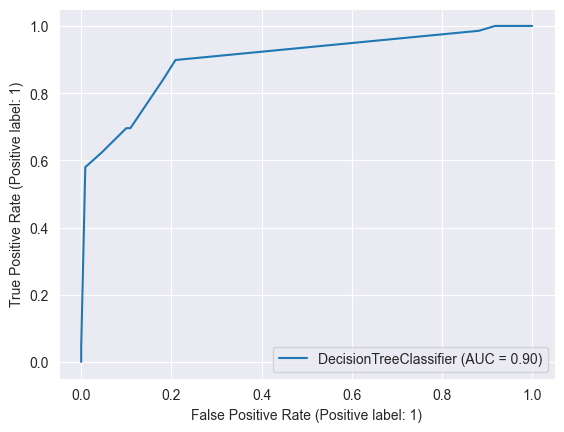

In [226]:
from sklearn import metrics
metrics.plot_roc_curve(best_clf, X_test, y_test)
plt.show()

### Задача
Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [227]:
heart_diseas_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
heart_diseas_df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [229]:
X_train = heart_diseas_df.drop(['num'], axis=1)

In [230]:
y_train = heart_diseas_df['num']

In [231]:
clf = DecisionTreeClassifier(criterion='entropy')

In [232]:
heart_diseas_fit = clf.fit(X_train, y_train)

In [235]:
clf.score(X_train, y_train)

0.7016806722689075

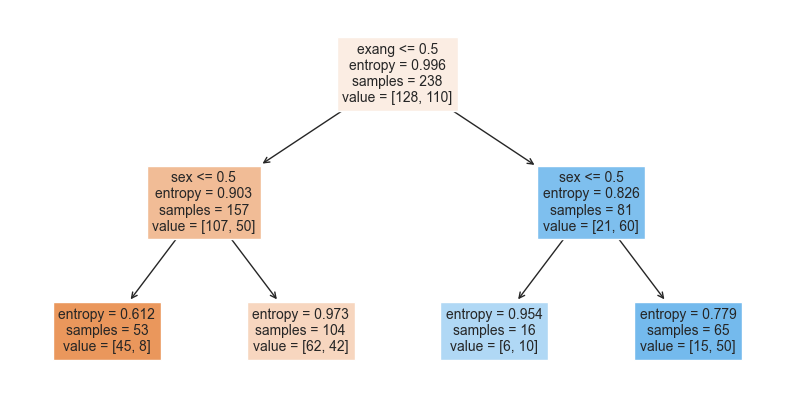

In [236]:
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)
plt.show()

In [252]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0]
n1 = clf.tree_.n_node_samples[l_node]
n2 = clf.tree_.n_node_samples[r_node]
e1 = clf.tree_.impurity[l_node]
e2 = clf.tree_.impurity[r_node]
n = n1 + n2

ig = 0.996 - (n1 * e1 + n2 * e2) / n

In [260]:
print('IG = E - (n1/N * E1 + n2/N * E1)')
print('n1:', n1)
print('n2:', n2)
print('e1:', e1)
print('e2:', e2)
print(round(ig, 4))

IG = E - (n1/N * E1 + n2/N * E1)
n1: 157
n2: 81
e1: 0.9027113410339267
e2: 0.8256265261578954
0.1195


### Задача
Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [263]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 37)

In [265]:
dt = DecisionTreeClassifier()

In [266]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [267]:
predicted = dt.predict(X_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

dt = DecisionTreeClassifier(criterion='entropy')
predicted = dt.fit(X_train,y_train).predict(X_test)

<img src='/Users/mitya/Desktop/Снимок экрана 2022-11-10 в 14.23.37.png'/>

### Задача
Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [269]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [270]:
clf = DecisionTreeClassifier()

In [273]:
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=GridSearchCV(clf, params)
search.fit(X, y)
best_tree = search.best_estimator_

In [274]:
best_tree

DecisionTreeClassifier(max_depth=3)

In [277]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

### Задача
Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [280]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [281]:
clf = DecisionTreeClassifier()

In [282]:
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=RandomizedSearchCV(clf, params)
search.fit(X, y)
best_tree = search.best_estimator_

In [283]:
best_tree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

### Задача
Воспользуемся изученными приёмами и попредсказываем!
Даны 2 датасэта, к которым вы можете обращаться:

- train - размеченный с известными правильным ответами (хранятся в колонке y)
- test - набор, где нужно предсказать их

Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = train.drop(['y'], axis=1)
y_train = train['y']
x_test = test
clf = DecisionTreeClassifier()
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=GridSearchCV(clf, params)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
predictions = best_tree.predict(x_test)